In the code below we are will build an autoencoder using Keras. The dataset is the Minst dataset which composes of 60000 images of numbers. Each picture has 28x28 (784) pixels. We will flatten each picture into a single vector and then use these vectors as training data to or neural network.

Again we are going to use TensorFlow 2.0. I have mounted my Google Drive to store the proposed model in 



In [1]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
# Load the Drive helper and mount
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir("/content/drive/My Drive/dcu/future Learn_v2/MOOC 4 - CA683 - Feature engineering/M4 Colab Files/Data")
#!ls

The code below is very similar to that used in the previous step. However, in it you will see the following:

>model = Sequential()
>model.add(Dense(784,activation='relu',input_dim=784))
>model.add(Dense(256,activation='relu'))
>model.add(Dense(128,activation='relu'))
>model.add(Dense(256,activation='relu'))
>model.add(Dense(784,activation='relu'))
>model.compile(loss='mean_squared_error',
>              optimizer=tf.optimizers.RMSprop(lr=0.0001, rho=0.9,   
>epsilon=None, decay=0.0),
>              metrics = ['accuracy'])

This code basically "shoves" the data into a bottleneck that is initially 256 pixels wide and then does this again into the centre bottleneck which is 128 pixels wide. We have also picked a different [optimizer](http://tflearn.org/optimizers/). In order to understand the difference between the various optimizers, have a look at this article from [Toward Science](https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b). It should give you a feel for how they work.

You can now see that we have an Autoencoder framework built to process all our images.



Using TensorFlow backend.


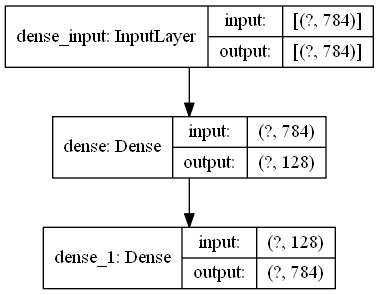

In [3]:

import tensorflow as tf
from keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras import regularizers

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

import numpy as np

temp = []
for img in x_train:
    t = []
    for row in img:
        for i in row:
            t.append(i)
    temp.append(t)
x_train = []
x_train = temp

x_train = np.array(x_train)

x_train = x_train.reshape(60000,784)

model = Sequential()
model.add(Dense(128,activation='relu',input_dim=784))
model.add(Dense(784,activation='relu'))

model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)





We now have our framework which is shown above and we can now run our data through it using the model.fit method. We will save the model to our local google drive. This is worth doing regularly as you may have to start your analysis again as third party platforms like Google Colab will shut you out after a specified time.

In [4]:
#print(x_train.shape)

history=model.fit(x_train,x_train,verbose=1,epochs=10,batch_size=256)
model.save('auto_en.h5')
 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0613 - accuracy: 0.0093
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0299 - accuracy: 0.0126
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0203 - accuracy: 0.0117
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0163 - accuracy: 0.0127
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0142 - accuracy: 0.0128
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0129 - accuracy: 0.0132
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0120 - accuracy: 0.0134
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0113 - accuracy: 0.0138
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0108 - accuracy: 0.0142
Epoch 10/10
60

In [5]:
print(history.history['loss'])

[0.06128483281731605, 0.029864599680900574, 0.02033117534617583, 0.01630758627553781, 0.014175696745018165, 0.012864945952097575, 0.011958884366353353, 0.011293011824289958, 0.010787331167360147, 0.010390686251223087]


**In this code snippet we are trying to extract the data from the hidden layer (128). We could use this data as a reduced dataset for further analysis.**

In [6]:
get_hidden_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_hidden_layer_output([x_train])[0]
print(np.shape(layer_output))

(60000, 784)


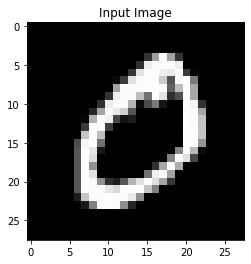

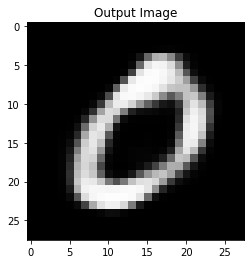

NameError: name 'predicted_image' is not defined

In [12]:
from tensorflow.python.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
model = load_model('auto_en.h5')

test = x_train[1].reshape(1,784)
y_test = model.predict(test)

inp_img = []
temp = []
for i in range(len(test[0])):
    if((i+1)%28 == 0):
        temp.append(test[0][i])
        inp_img.append(temp)
        temp = []
    else:
        temp.append(test[0][i])
out_img = []
temp = []
for i in range(len(y_test[0])):
    if((i+1)%28 == 0):
        temp.append(y_test[0][i])
        out_img.append(temp)
        temp = []
    else:
        temp.append(y_test[0][i])
        
inp_img = np.array(inp_img)
out_img = np.array(out_img)
#plt.imshow('Test Image',inp_img) 
plt.title('Input Image')

plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
plt.show()
plt.title('Output Image')

plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.show()

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#cv2_imshow(inp_img)
#cv2.imshow('Output Image',out_img)
#cv2.waitKey(0)

Hopefully, by now you will have got the idea of an Autoencoder. Now I would like you to try a few things before we move on and they are as follows:

* Print out a larger number of pictures. 

* Run a number of epochs and print a graph of the Epoch number against the Loss or MSE. You may find this [code](https://keras.io/visualization/) useful.

* Do this analysis for the Boston housing data. Try and use the hidden layer as input to both a regression and Neural Network to predict housing prices.



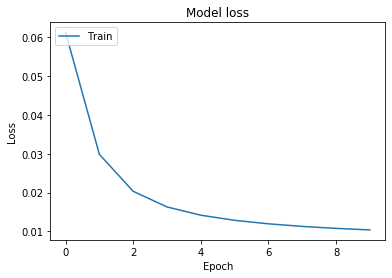

In [8]:
import matplotlib.pyplot as plt





# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()